In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
# Upload data and view rows
df = pd.read_csv("D:\Data_analysis\LA_PayRole\payroll.csv")
df.head(3)

C:\Users\KIMO STORE\AppData\Local\Temp\ipykernel_15628\3986436692.py:2: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Data_analysis\LA_PayRole\payroll.csv")


,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55725.24,4785.05,2021.84,62532.13,3678.0,23508.9,FEMALE,HISPANIC
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139174.88,16340.50,6170.49,161685.87,9186.0,23508.9,FEMALE,ASIAN AMERICAN
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245879.12,0.00,12504.30,258383.42,16228.0,23508.9,MALE,BLACK


In [4]:
# Show total rows and columns
df.shape

(685461, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685461 entries, 0 to 685460
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RECORD_NBR                     685461 non-null  object 
 1   PAY_YEAR                       685461 non-null  int64  
 2   DEPARTMENT_NO                  685461 non-null  int64  
 3   DEPARTMENT_TITLE               685461 non-null  object 
 4   JOB_CLASS_PGRADE               684919 non-null  object 
 5   JOB_TITLE                      684919 non-null  object 
 6   EMPLOYMENT_TYPE                685461 non-null  object 
 7   JOB_STATUS                     685461 non-null  object 
 8   MOU                            684777 non-null  object 
 9   MOU_TITLE                      684712 non-null  object 
 10  REGULAR_PAY                    685461 non-null  float64
 11  OVERTIME_PAY                   685027 non-null  float64
 12  ALL_OTHER_PAY                 

In [6]:
# Total Avirage of paid amount by year
Avg_Total_Paid_Amount = pd.pivot_table(df, values='TOTAL_PAY', index=['PAY_YEAR'], aggfunc=np.mean, fill_value=0)
Avg_Total_Paid_Amount

,TOTAL_PAY
PAY_YEAR,
2013,73346.741990
2014,76753.194806
2015,74764.558992
2016,70529.985632
2017,73493.681288
2018,72090.465915
2019,79620.031823
2020,88520.358996
2021,85658.243956


<AxesSubplot: xlabel='PAY_YEAR'>

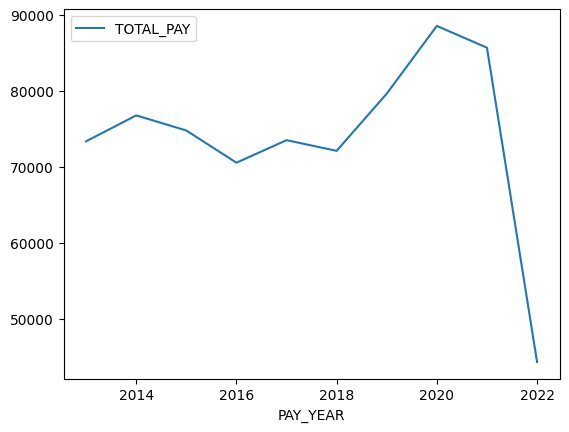

In [7]:
# Line plot of Avg_Total_Paid_Amount
Avg_Total_Paid_Amount.plot.line()

In [9]:
# Total Employees by the different Types
Total_emplyee_type = pd.pivot_table(df, values='GENDER', index=['PAY_YEAR'],
                    columns=['EMPLOYMENT_TYPE'], aggfunc=np.count_nonzero, fill_value=0)
Total_emplyee_type

EMPLOYMENT_TYPE,FULL_TIME,PART_TIME,PER_EVENT
PAY_YEAR,,,
2013,49990,13740,156
2014,51683,12554,223
2015,52960,14493,213
2016,55126,16455,388
2017,57695,14534,361
2018,62839,13974,2021
2019,59778,14059,345
2020,61674,12915,438
2021,57211,10006,201


<AxesSubplot: xlabel='PAY_YEAR'>

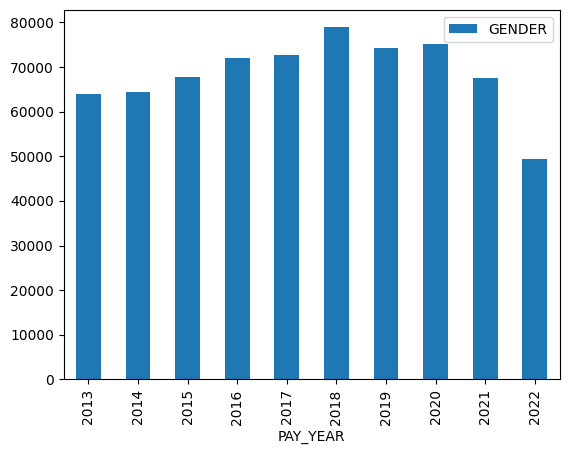

In [10]:
Total_employee_year = pd.pivot_table(df, values='GENDER', index=['PAY_YEAR'], aggfunc=np.count_nonzero, fill_value=0)
Total_employee_year.plot.bar()

In [11]:
# The average pay for Employees by the different types of pay
Payroll_Details = pd.pivot_table(df, values=['REGULAR_PAY', 'OVERTIME_PAY', 'ALL_OTHER_PAY', 'TOTAL_PAY'], index=['PAY_YEAR'], aggfunc=np.mean, fill_value=0)
Payroll_Details

,ALL_OTHER_PAY,OVERTIME_PAY,REGULAR_PAY,TOTAL_PAY
PAY_YEAR,,,,
2013,5297.919582,6020.957343,62048.417491,73346.741990
2014,6319.890779,7410.267807,63055.035517,76753.194806
2015,5419.294384,8294.302734,61082.586903,74764.558992
2016,3426.199629,8070.740259,59033.045744,70529.985632
2017,3479.382506,8886.684074,61127.614708,73493.681288
2018,3441.259556,8988.748342,59660.458017,72090.465915
2019,3805.199337,10542.608424,65272.224061,79620.031823
2020,5852.276336,10726.385255,71941.697405,88520.358996
2021,6157.103169,10212.045352,69289.095435,85658.243956


<AxesSubplot: xlabel='PAY_YEAR,GENDER'>

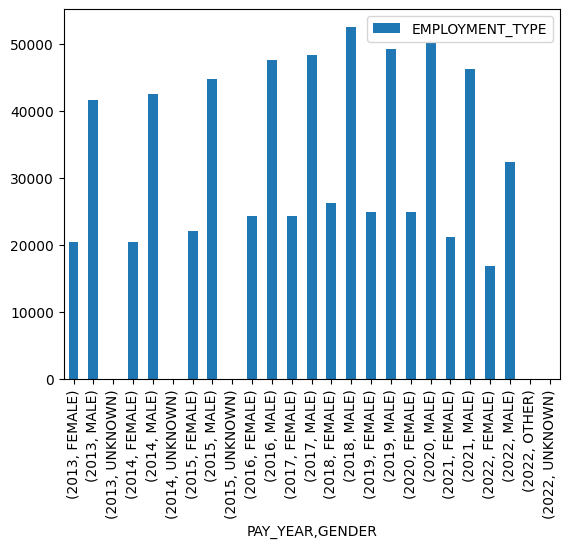

In [13]:
# Total Employees by the different gender and years
Total_gender_year= pd.pivot_table(df, values='EMPLOYMENT_TYPE', index=['PAY_YEAR', 'GENDER'], aggfunc=np.count_nonzero, fill_value=0)
Total_gender_year.plot.bar()

In [14]:
Avg_Total_Paid_Amount_by_gender = pd.pivot_table(df, values='TOTAL_PAY', index=['PAY_YEAR', 'GENDER'], aggfunc=np.mean, fill_value=0)
Avg_Total_Paid_Amount_by_gender

TOTAL_PAY
PAY_YEAR GENDER                
2013     FEMALE    54666.784305
         MALE      82496.606416
         UNKNOWN   16896.880000
2014     FEMALE    57741.707241
         MALE      86467.464557
         UNKNOWN    7329.895000
2015     FEMALE    54533.361567
         MALE      85395.462194
         UNKNOWN    8251.740000
2016     FEMALE    50343.132260
         MALE      80830.820593
2017     FEMALE    52596.549349
         MALE      84002.168435
2018     FEMALE    51511.757135
         MALE      82403.331664
2019     FEMALE    56209.236096
         MALE      91490.703065
2020     FEMALE    64352.155812
         MALE     100516.973225
2021     FEMALE    65438.533574
         MALE      94948.901693
2022     FEMALE    33626.600257
         MALE      49974.467541
         OTHER     38047.093333
         UNKNOWN     150.830000